# __FINAL PROJECT PHASE IV__

## *Table of Contents*
1. Introduction <br>
    a. Background and Context <br>
    b. Importance and stakes of our setting <br>
    c. Data Sources and Key Terms <br>
    d. Research Question <br>
    e. Summary of Results <br>
2. Data Description <br>
    a. Brief description and discussion of reliability <br>
    b. Importing the cleaned dataset from a separate data cleaning notebook <br>
3. Visuals for data <br>
    a. Figures from Phase 2 EDA to build background understanding of our cleaned dataset <br>
5. Preregistration Statements <br>
6. Data Analysis <br>
    a. Data Exploration <br>
    b. Research Question Models (part 1) <br>
    c. Analyses of findings <br>
    d. Research Question Models (part 2) *answering questions raised from research models part 1* <br>
7. Evaluation of Significance <br>
8. Conclusions <br>
9. Limitations <br>
10. Acknowledgements and Bibliography <br>

# __1. INTRODUCTION:__

Streaming media has increasingly become popular in the 21st century, with viewers favoring on-demand content without the restrictions of a fixed broadcast schedule. Recently in 2024, the US movie market was valued at $23.44 billion (Research And Markets 2025). Widely recognized as a popular streaming service, Netflix boasts 301.6 million annual subscribers globally and a 21% US market share of streaming video on demand in 2025 (TwinStrata 2025).  
To maintain retention and achieve maximum profit, companies such as Netflix must guage which titles are popular amongst viewers. Understanding viewers also allows companies to predict how viewers would react to future shows, helping the company decide their future direction. As for viewers, they want to maximize entertainment. When choosing a film to satisfy their needs, they can turn to IMDb. IMDb is well-known website that primarily offers ratings and reviews from fellow viewers, as well as rankings and movie information like release year. 
Given its significance, we decided to investigate Netflix viewership and IMDb ratings and genre. Research questions are presented below:

# __Research Question(s):__

### Research Questions:
What set of criteria (genre type, IMDb ratings, number of votes towards ratings, global availability) are most important to obtain the most viewership on Netflix from 2023 to 2025? Are we able to accurately predict viewership according to IMDb ratings and global availability?

### Sub-Questions (labeled 1 through 3):
- Does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres? (1)
- In the past two years, have films needed to be globally available in order to reach high popularity in terms views of the movie? (2)
- Is there a direct linkage between ratings and number of votes, or are there additional variables that need to be considered that affect this relationship? (3)


To conduct this research, we sourced public data from Netflix engagement reports (collected semi-annually and spanning from January 2023 to July 2025) and IMDb files. To elaborate on the set of criterias at hand, viewership is the number of hours that a user watched a movie for divided by the runtime in hours acccumulated in the provided and observed period in the engagment reports. IMDb ratings are out of 10 in ascending order where 1 is lowest and 10 is highest and collected by IMDb. Global availability is essentially whether or not a movie is able to be watched in all countries with Netflix.

### Summary of Results
We created hypothesis tests for each of our three pre-registered subquestions. Via subquestion 2 analysis, we found that globally available movies exceed non-globally available movies in popularity. In fact, via subquestion 1 analysis, we found that the global availability variable had a larger impact on popularity than ratings, number of votes, and all genres except for the Talk-Show genre. For subquestion 3, looking at a possible relationship between ratings and (LOG?) number of votes, we found a positive correlation. <-- FIX THE PREVIOUS SENTENCE, WHETHER OR NOT IT IS A POSITIVE CORRELATION OR NOT. We wondered if there was nuance to this positive correlation, and we decided to further visualize the ratings and number of votes.


Based on the results, Netflix has actionable insights for making their future movie catalogue. Specifically, they should prioritize contracts for globally available movies since this trait is very impactful on movie popularity, defined in terms of views. Additionally, Netflix should consider adding more Talk-Show, Adventure, and Action movies, as these genres have the highest coefficients and are most positively influential for popularity.


### Data Overview & Sources:

In total, we collect seven data tables (linked below). The first five are taken from Netflix regarding semi-annual engagement reports starting from the first half of 2023 to the first half of 2025. Each report includes 2 tabs, (Shows and Films) or (Shows and Movies), and their respective data (i.e. runtime, viewership, global availability). The first half of 2023 report is an excpetion with only 1 tab of both shows and movies combined, but this gets handled in our data cleaning.

Meanwhile, the following two IMDb data tables are combined to give us an extensive IMDb table to cross reference with the Netflix engagement reports. The IMDb ratings data table contains all the movies and shows, each identified by a unique ID that is not the movie/show title. The IMDb titles data table provides these IDs and the actual title, allowing us to link each movie/show's ratings with their title. 

### Importing:

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import duckdb
from datetime import time
from sklearn.linear_model import LinearRegression, LogisticRegression
import re
import scipy.stats 
import statsmodels.api as sm

In [2]:
pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# __2. DATA DESCRIPTION AND CLEANING:__


Here is the link to the ipynb on github of data-cleaning.ipynb: https://github.com/xuanlianliu/Data_Science_Project/blob/862fbb046f0de1b6ac9e8ad7e9c05a4367c43239/data-cleaning.ipynb

In [3]:
#Importing the cleaned dataset from our separate data cleaning notebook
netflix_df = pd.read_csv('netflix_ratings.csv')

### Brief Description and Reliability Discussion
Our dataframe was created by joining multiple Netflix engagement reports from different periods and merged with the IMDb ratings dataset to observe if any factors had the most influence on viewership for Netflix films and predict viewership for films outside of the dataset according to observed criteria. The cleaned dataset for analysis consists of 8772 Netflix films watched from January 2023 to June 2025, along with their respective attributes in terms of global availability, hours viewed, runtime, views, average IMDb rating, number of votes (defined in the next cell).

All source datasets used during this phase and their creation were funded by either Netflix or IMDb. In the earliest engagement report, Netflix states that the dataset representing 99% of all viewing on Netflix, so there is low concern that data is not recorded. Because IMDb ratings are made by users, it is possible that the most recent movies or those with low audience engagement are not observed in the IMDb source dataset. However, these concerns have little impact on our cleaned dataset, which spans until June of 2025 which is 4 months ago and only has movies with over 100,000 Netflix views (thus likely getting some ratings). Both Netflix viewers and IMDb reviewers should reasonably know that their behavior is tracked, although they may not know their data would be used to make these public datasets. Fot Netflix viewers, Netflix recommends shows based off of previous titles watched, so users know their watching is monitored. For IMDb reviewers, everyone's ratings are public on the site, so they know their ratings are not private. We do not forsee a notable change in viewing or rating behavior due to the fact that people consider that their data gets collected for a dataset. 

As a whole, both the Netflix and IMDb original data sources were preprocssed into (mostly) consistent datasets, but the column names were not consistent with each other. Our original plan was to create a dataset containing both Netflix films and shows, but upon merging with the IMDb dataset, we discovered that many shows were missing rating information and so we decided to focus solely on films. This meant reducing our dataset, but given that we are still able to work with around 8,772 instances of films, we should have sufficient data for performing exploratory analysis. We decided to retain the majority of the attributes found in both the Netflix and IMDb datasets since our research aims to identify which factors most strongly influence viewership. Removing such attributes could limit the scope of our findings later on.

Much of the data cleaning that was performed using SQL. Our first task involved merging the IMDb datasets together, as title.ratings.tsv only contains ratings corresponding to an ID and not a film title while title.basics.tsv includes the corresponding film title along with their respective IDs. By performing a SQL join on these two datasets, we obtained a single dataframe containing both film titles and their ratings. 

The second task was to combine all of Netflix’s semi-annual engagement datasets into a master dataset. Using the UNION ALL operator in SQL, we were able to successfully retain all instances from all four datasets. During this process, we also noticed that some Netflix films contained titles in their original languages which would be a problem when merging with the IMDb dataset that only has titles in English. To ensure consistent title matching, we cleaned up the film titles by removing the extra info that followed // by simply replacing a part of the title string with an empty string. Additionally, for titles that had it, we cleaned the film titles by removing the year in parenthesis.

Once that was done, we performed an inner join between our Netflix and IMDb datasets using the shared column Title. This join type allowed us to keep only instances of the Netflix dataset with corresponding IMDb data, so our dataset would not have missing rating values. 

Additionally, we created dummy variables like Is_Global and Popularity, to support our exploratory analysis. The Is_Global variable was encoded as 1 for films globally available and 0 for unavailable. The column, Popularity, that marked whether a film had more than the median views was created and then converted into a binary variable with 1 being popular and 0 for not popular.

All raw source data can be found on the Github folder which can also be accessed here. 
https://github.com/xuanlianliu/Data_Science_Project

Further definitions of our columns:  
Title: the title of the film (must match in both Netflix and IMDb)  
Global: either "Yes" or "No" to the film's ability to be watched in all countries with Netflix  
Hours_Viewed: the number of hours the film was watched, accumulated in the time period  
Runtime: the length of the film  
Views: the Hours_Viewed multiplied by the Runtime  
Time_Period: the time interval in which the viewership data was collected. Is measured semi-annually, either Jan-Jun or Jul-Dec  
average_Rating: the rating given by IMDb users, out of 10 in ascending order where 1 is lowest and 10 is the highest  
numVotes: the number of votes cast for the film  
Is_Global: measures global availibility, encoded as 1 for films globally available and 0 for unavailable  
Popularity: measures whether a film had more than the median views was created, encoded as 1 being popular and 0 for not popular  
Sufficient Votes: measures whether a film recieved sufficient votes, defined as more than the median number of votes, encoded as 1 being sufficient votes and 0 for not sufficient

# __3. Visuals for Data:__

Below are some figures from our Phase 2 EDA to better explain our data.

### Movie Viewership based on Ratings and Global Availability:

Linear Regression (x - ratings, y - viewership), Avg Views on each rating as bar graph

To help gauge whether or not there is a relationship between Views and Ratings and the relationship between Views and Global Availability, we need a series of graphs.

Conduct a scatterplot analysis on the number of views for a movie based on the ratings and global availability.

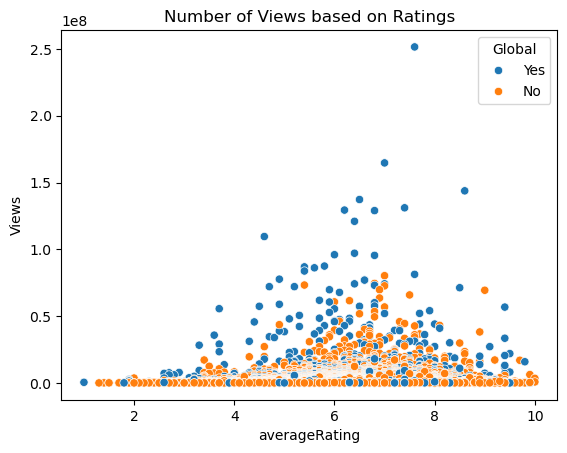

In [4]:
plot = sns.scatterplot(netflix_df, 
             x='averageRating', y='Views', marker='o', hue="Global")
plt.title("Number of Views based on Ratings");

### Correlation and Regression

Now, we will create a multi-variable correlation matrix to examine the strength and directions of relationships with the following variables: Views, Hours Viewed, Runtime, Global Availability, Average Rating, Number of Votes, and Popularity.

In [5]:
corr_df = netflix_df[['Views', 'Hours_Viewed', 'Runtime', 'Is_Global', 
                              'averageRating', 'numVotes', 'Popularity']].corr()
corr_df

,Views,Hours_Viewed,Runtime,Is_Global,averageRating,numVotes,Popularity
Views,1.000000,0.984744,0.032270,0.205024,0.028047,0.082591,0.506780
Hours_Viewed,0.984744,1.000000,0.092977,0.193060,0.035552,0.094048,0.493988
Runtime,0.032270,0.092977,1.000000,-0.104442,0.149496,0.172153,0.068314
Is_Global,0.205024,0.193060,-0.104442,1.000000,-0.007798,-0.083922,0.188651
averageRating,0.028047,0.035552,0.149496,-0.007798,1.000000,0.118913,0.025556
numVotes,0.082591,0.094048,0.172153,-0.083922,0.118913,1.000000,0.190489
Popularity,0.506780,0.493988,0.068314,0.188651,0.025556,0.190489,1.000000


The correlation matrix displays a very high correlation, 0.98, between Views and Hours Viewed, and this clearly makes sense because being viewed (the number of views) is linked with being viewed (in hours). We also observe a positive correlation of 0.20 between Views and being globally available, a positive correlation of 0.02 between Views and Average Rating, a postive correlation of 0.07 between Views and Number of Votes, and 0.51 between Views and Popularity.

We will fit a linear regression model predict view counts given the ratings.

The model's slope is: 190239.15
The model's intercept is: 1369579.07


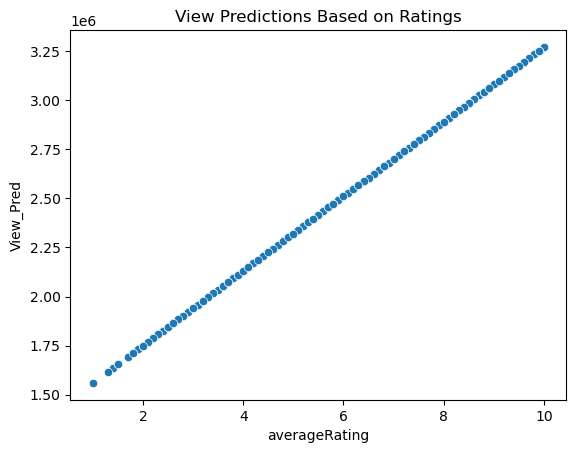

In [6]:
no_nan_df = netflix_df.copy().dropna()
x = no_nan_df[['averageRating']].values
y = no_nan_df[['Views']].values

ratings_model = LinearRegression().fit(x,y)
print("The model's slope is: " + str(round(float(ratings_model.coef_[0][0]),2)))
print("The model's intercept is: " + str(round(float(ratings_model.intercept_[0]),2)))

no_nan_df["View_Pred"] = ratings_model.predict(x)
plot2 = sns.scatterplot(no_nan_df, 
             x='averageRating', y='View_Pred')
plt.title("View Predictions Based on Ratings");


We will fit a logistic regression model to determine the coefficient and intercept to see how the odds of the popularity change for each unit of increase in ratings.

In [7]:
x = netflix_df['averageRating'].values.reshape(-1, 1)
y = netflix_df['Popularity']
model = LogisticRegression().fit(x,y)

print(model.coef_[0][0])
print(model.intercept_[0])

0.05212107998844987
-1.7410939022793324


Using the model's predict_proba, we can find the probability of a movie being successful based on the average rating.

<Axes: xlabel='averageRating', ylabel='popularity_pred'>

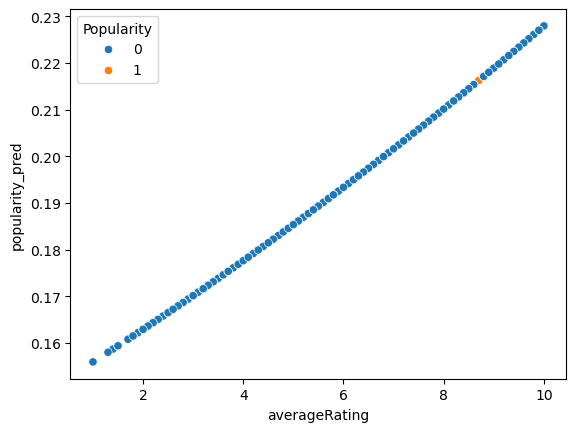

In [8]:
netflix_df['popularity_pred'] = model.predict_proba(netflix_df[
    ['averageRating']].values)[:, 1]
sns.scatterplot(x = netflix_df['averageRating'], 
                y = netflix_df['popularity_pred'], hue = netflix_df['Popularity'])                                                           

### Global Availability Pie Charts:

The following pie charts are meant to visualize the bearing that the trait of global analysis has on popularity. Findings are stated at the end of this section.

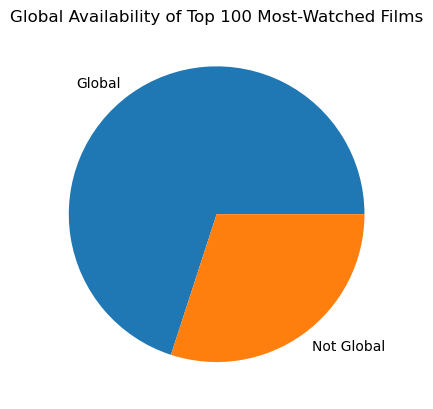

In [25]:
#Top 100 viewed films by global availability
netflix_top_100 = duckdb.sql("""SELECT *
                                FROM netflix_df
                                WHERE Views is NOT NULL
                                ORDER BY Views
                                DESC LIMIT 100""").df()
yes_count = (netflix_top_100["Global"]=="Yes").sum()
no_count  = (netflix_top_100["Global"]=="No").sum()

y = np.array([yes_count, no_count])
mylabels = ["Global", "Not Global"]

plt.pie(y, labels = mylabels)
plt.title("Global Availability of Top 100 Most-Watched Films")
plt.show() 

#creating pie chart source:
#https://www.w3schools.com/python/matplotlib_pie_charts.asp

Out of the most 100 most viewed films in our dataset, approximately 2/3 of them are globally available and 1/3 are not globally available. Below, let's look more closely at whether or not this phenomenon occurs across all films and the statistical significance of global availability. 

# __4. PREREGISTRATION STATEMENTS(S):__
!!!!Insert preregistration statements here with hypothesis, description, and context for why you believe in your hypothesis by referencing domain knowledge or other literature. Refer to Phase 3 rubric for
more details.!!!!!

-Sub-question 1: Does the global availability of movies have a larger impact on the movie popularity (defined in terms of views) compared to ratings, the number of votes, and genres?
- $H_0$: Global availability IS NOT the most impactful variable on the movie popularity.
- $H_A$: Global availability IS the most impactful variable on the movie popularity.

Rationale: Because globally available shows can technically reach more individuals, it is likely that it is highly influential in terms of viewership and therefore popularity.  Comparing the impact of global availability to ratings, number of votes, and genres, global availability logically seems to reach more people, as not everyone looks at ratings, number of votes, or different types of genres.  It is more niche.  Therefore, the null hypothesis is likely to be rejected.

-Sub-question 2: In the past two years, have films needed to be globally available in order to reach high popularity in terms views of the movie?
- $H_0$: Globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views.
- $H_A$: Globally available movies ARE better than non-globally available movies in being popular, defined in terms of views.

Rationale: Based on the pie chart of the top 100 films from the section above, it seems like being globally available does make a film more likely to be popular. Intuitively, this makes sense for two reasons. First, being available globally means a larger audience who may watch the film. Second, when an audience truly likes a film, they will spread it to others, and being global increases the potential for this viral sharing. Therefore, I believe that the null hypothesis has a high chance of being rejected.

-Sub-question 3: Is there a direct linkage between ratings and number of votes, or are there additional variables that need to be considered that affect this relationship? (3)
- $H_0$: There IS NOT a direct relationship between ratings and number of votes. 
- $H_A$: There IS a direct relationship between ratings and number of votes.

Rationale: INSERT HERE

# __5. DATA ANALYSIS:__

**Analysis of pre-registration statement 1 is below:**

This bar chart allows us to interpret the popularity of a movie based on the Genre of the movie.  It seems that the Comedy and Drama genres have the most popular movies among them.

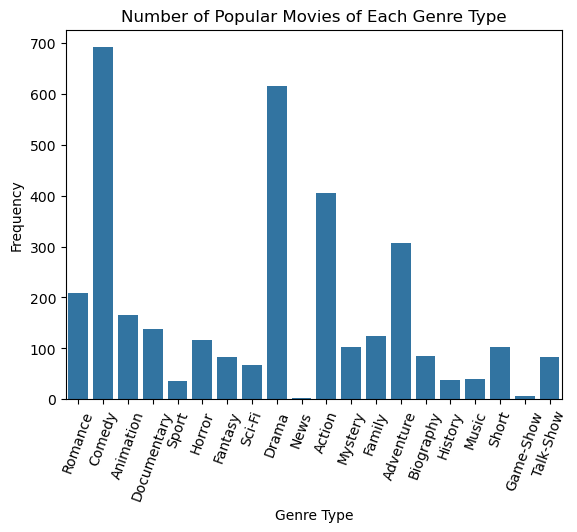

In [23]:
#Creating a bar plot see see which of the genres have the highest frequency of being a popular movie
genres = ["Genre: Romance",
        "Genre: Comedy",
        "Genre: Animation",
        "Genre: Documentary",
        "Genre: Sport",
        "Genre: Horror",
        "Genre: Fantasy",
        "Genre: Sci-Fi",
        "Genre: Drama",
        "Genre: News",
        "Genre: Action",
        "Genre: Mystery",
        "Genre: Family",
        "Genre: Adventure",
        "Genre: Biography",
        "Genre: History",
        "Genre: Music",
        "Genre: Short",
        "Genre: Game-Show",
        "Genre: Talk-Show"]
popular_df = netflix_df[netflix_df["Popularity"] == 1][genres]
sums = []


for g in genres:
    sums.append(popular_df[g].sum())

genres = ["Romance",
        "Comedy",
        "Animation",
        "Documentary",
        "Sport",
        "Horror",
        "Fantasy",
        "Sci-Fi",
        "Drama",
        "News",
        "Action",
        "Mystery",
        "Family",
        "Adventure",
        "Biography",
        "History",
        "Music",
        "Short",
        "Game-Show",
        "Talk-Show"]
df = pd.DataFrame({
    "Genre": genres,
    "Frequency": sums
})
sns.barplot(df, x="Genre", y="Frequency")
plt.xlabel("Genre Type")
plt.ylabel("Frequency")
plt.title("Number of Popular Movies of Each Genre Type")
plt.xticks(rotation=70)
plt.show()

Once, we understand how Genres relate to the popularity, it is time to see how much all variables like global availability, number of votes, and ratings effect the prediction of the popularity through Logistic Regression.

In [ ]:
#Multivariable Logistic Regression to predict movie popularity
x = netflix_df[["Is_Global",
                "averageRating",
                "numVotes",
                "Genre: Romance",
                "Genre: Comedy",
                "Genre: Animation",
                "Genre: Documentary",
                "Genre: Sport",
                "Genre: Horror",
                "Genre: Fantasy",
                "Genre: Sci-Fi",
                "Genre: Drama",
                "Genre: News",
                "Genre: Action",
                "Genre: Mystery",
                "Genre: Family",
                "Genre: Adventure",
                "Genre: Biography",
                "Genre: History",
                "Genre: Music",
                "Genre: Short",
                "Genre: Game-Show",
                "Genre: Talk-Show"]]
y = netflix_df["Popularity"]
model = LogisticRegression(max_iter=1000).fit(x,y)

print("The model's Is_Global coefficient is: " + str(round(float(model.coef_[0][0]),2)))
print("The model's averageRating coefficient is: " + str(round(float(model.coef_[0][1]),2)))
print("The model's numVotes coefficient is: " + str(round(float(model.coef_[0][2]),2)))
print("The model's Romance Genre coefficient is: " + str(round(float(model.coef_[0][3]),2)))
print("The model's Comedy Genre coefficient is: " + str(round(float(model.coef_[0][4]),2)))
print("The model's Animation Genre coefficient is: " + str(round(float(model.coef_[0][5]),2)))
print("The model's Documentary Genre coefficient is: " + str(round(float(model.coef_[0][6]),2)))
print("The model's Sport Genre coefficient is: " + str(round(float(model.coef_[0][7]),2)))
print("The model's Horror Genre coefficient is: " + str(round(float(model.coef_[0][8]),2)))
print("The model's Fantasy Genre coefficient is: " + str(round(float(model.coef_[0][9]),2)))
print("The model's Sci-Fi Genre coefficient is: " + str(round(float(model.coef_[0][10]),2)))
print("The model's Drama Genre coefficient is: " + str(round(float(model.coef_[0][11]),2)))
print("The model's News Genre coefficient is: " + str(round(float(model.coef_[0][12]),2)))
print("The model's Action Genre coefficient is: " + str(round(float(model.coef_[0][13]),2)))
print("The model's Mystery Genre coefficient is: " + str(round(float(model.coef_[0][14]),2)))
print("The model's Family Genre coefficient is: " + str(round(float(model.coef_[0][15]),2)))
print("The model's Adventure Genre coefficient is: " + str(round(float(model.coef_[0][16]),2)))
print("The model's Biography Genre coefficient is: " + str(round(float(model.coef_[0][17]),2)))
print("The model's History Genre coefficient is: " + str(round(float(model.coef_[0][18]),2)))
print("The model's Music Genre coefficient is: " + str(round(float(model.coef_[0][19]),2)))
print("The model's Short Genre coefficient is: " + str(round(float(model.coef_[0][20]),2)))
print("The model's Game-Show Genre coefficient is: " + str(round(float(model.coef_[0][21]),2)))
print("The model's Talk-Show Genre coefficient is: " + str(round(float(model.coef_[0][22]),2)))

Because the coefficients are significantly higher in the Talk-Show Genre and the Is_Global variable, we have to look at the p-values and see whether to reject the null or fail to reject.  This is done through the logit() funciton, where we can see a summary table that contains the z-score and also the P-Value.

In [ ]:
#Summary Table to compare impacts of global availability, ratings, number of votes, and genres
X = sm.add_constant(x)
logitModel = sm.Logit(y, X).fit()
print(logitModel.summary())

Interpretation: Since the P-value of both Global availability and Talk-Show is 0.000.  We fail to reject the null hypothesis and cannot conclude that Global availability IS NOT the most impactful variable on movie popularity.

**Analysis of pre-registration statement 2 is below:**

In [ ]:
#define the number of movies
N= len(netflix_df)

#find probability of non-global movie being popular
not_global_df= duckdb.sql("""SELECT *
FROM netflix_df
WHERE Global== 'No'""").df()
not_global_and_popular= (not_global_df["Popularity"]==1).sum()

not_global_and_popular_share= not_global_and_popular/len(not_global_df)

#calculate number of expected popular movies if global and non-global movies perform the same
expected_popular= N*not_global_and_popular_share
print(f"Given that global and non-global movies perform the same,\n"  
      f"the expected number of non-global popular movies is {expected_popular}")
print(f"The actual number of non-global popular movies is {not_global_and_popular}")

#calculate standard deviation of number number of globally available popular movies
sd= np.sqrt(N*not_global_and_popular_share*(1-not_global_and_popular_share))

#calculate z-score
z_score= (not_global_and_popular- expected_popular)/sd
print(f"The z-score is: {z_score}")

#calculate p-value
print(f"The p-value is: {scipy.stats.norm.sf(abs(z_score))}")

Interpretation: The p-value is much smaller than our alpha of 0.05, so we reject the null that globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views.

**Analysis of pre-registration statement 3 is below:**

First, we’ll explore the main variables discussed in preregistration #3: ratings and number of votes. 

In the following two histograms, we can visualize the distributions of each variable independently. 

For the ratings distribution, we roughly observed a bell shaped distribution indicating that majority of the movies are rated as average to good (rating peak between 6 and 7). Meanwhile, only a small portion of movies are extremely high/low rated which can be seen at the respective tails of the distribution.

In [ ]:
sns.histplot(netflix_df['averageRating'])
plt.title("Distribution of Ratings")
plt.show()


For the number of votes distribution, the numVotes variable is extremely right-skewed due to some films having huge vote counts (in the millions). Using a log scale on this variable will allow for the distribution to become more readable. In the log transformed graph, the pattern is more visible. Here, there is a right skewed patten suggesting that majority of the movies in our dataset accumulated few votes and only a small portion of movies accumulated large vote counts.

In [ ]:
#not log transformed
sns.histplot(netflix_df['numVotes'])
plt.title("Distribution of Number of Votes")
plt.show()

#view numVotes outliers
print(netflix_df['numVotes'].sort_values(ascending=False).head(5))

#log transform numVotes since the distribution is not normal
netflix_df['log_votes'] = np.log10(netflix_df['numVotes'])
sns.histplot(netflix_df['log_votes'])
plt.title("Distribution of Number of Votes (logged)")
plt.show()

With a scatterplot, we can plot the logged number of votes on the x-axis and ratings on the y-axis to visualize how the average rating changes in relation to the vote count. We can also observe if there are any clusters at the very high/low ratings and if these could be attributed to low vote counts. We can also see if more votes will stabilize ratings to a certain value. 

From the graph, it's clear that there is no strong linear relationship as the points cluster between the rating scores of 5 and 8 and stretch across the number of votes. Movies with few votes show great variance in ratings, acknowledging extreme ratings and movies with a considerable amount of votes display more stability within their ratings with almost no movies falling below the rating of 4. 


In [ ]:
sns.scatterplot(netflix_df, x = 'log_votes', y= 'averageRating', hue='Sufficient Votes')
plt.title("Ratings vs Number of Votes (logged)")
plt.show()

We can first compute the Pearson correlation to determine if there is a clear relationship between the two variables. 

From the printed outputs, it seems there is a statistically significant (as seen from the pvalue) but extremely weak negative relationship between ratings and number of votes. Vote counts doesn't seem to have the ability to meaningfully predict the rating.

In [ ]:
corr, p_value = scipy.stats.pearsonr(netflix_df['log_votes'], netflix_df['averageRating'])
print("correlation:", corr)
print("p-value:", p_value)

In [ ]:
X = netflix_df['log_votes']
X = sm.add_constant(X)
y = netflix_df['averageRating']

model = sm.OLS(y, X).fit()
print(model.summary())

sns.lineplot(netflix_df, x="log_votes", y='averageRating')
plt.show()



# __6. EVALUATION OF SIGNIFICANCE:__

**Pre-registration Statement 1:** To determine the variable that had the most effect on the popularity of a movie, we turned to a Logistic Regression with a Logit function.  Based on the coefficients of each variable, we have determined that the Global availability of a movie and having a genre, talk-show, are the highest contributors to the popularity of a movie.  However, we found that the coefficient for the talk show had a coefficient of 1.517, which is greater than the Global availability’s coefficient of 1.2542.  With the P-value of both these variables being 0.000, we can establish that we will have to fail to reject the null hypothesis of Global availability not being the most impactful variable on movie popularity, as their p-values are the same, but the talk-show has a higher coefficient.

**Preregistration statement 2:** The analysis for global availability’s effect on popularity involved a hypothesis test with a bernoulli variable. If there is no difference in popularity between global and non-global movies, a movie’s probability of being popular is 0.16031073. Given that global and non-global movies perform the same, the expected number of non-global popular movies is 1406, but the actual number of non-global popular movies is 1135 movies. In other words, the actual number of non-global popular movies is 271 lower than expected if the null hypothesis is true. After calculating the z-score and using it as the parameter for the scipy.stats.norm.sf(abs(z_score)) function, the resulting p-value is 1.4684026891657207e-15, which is essentially 0. There is nearly 0 possibility of randomly getting the observed 1135 non-global popular movies if global availability has no statistically significant relationship with popularity. Ultimately, the p-value is lower than the significance level of 0.05, so we reject the null hypothesis that globally available movies ARE NOT better than non-globally available movies in being popular, defined in terms of views. 




# __7. CONCLUSION:__

Insert Here

# __8. DATA LIMITATIONS:__


There were several limitations we discovered in our dataset. 
- The Netflix source began with a release date column, which were missing many values, so we ultimately chose not to include this variable in our dataset. However, this exacerbates our time interval limitation: our dataset only covers a 2.5-year period worth of Netflix data spanning from January 2023 to June 2025. This short timeframe might make it hard for us to generalize our findings to other years and their films and may affect the accuracy of our predictive models. Additionally, the first half of 2023 dataset was missing 2 important variables: runtime and number of views. We filled these missing columns with their respective averages but this approach risks suggesting a consistent pattern across all the first half of 2023 films. While the missing values have been addressed, these are not exactly the true runtime and view values which could cause some discrepancies in our data analysis. In the graph of views over time, the aggregate views in 2023 is significantly lower than in each later period. We believe the reason for this unusual result is the lack of full data in the source for the first half of 2023.
- Our Netflix dataset contains duplicates of certain films as they appeared in multiple engagement reports during collection. To address this, we removed the duplicates and kept only the instance with its max views. Such removal might reduced the total number of views for certain Netflix time periods and alter our observations of viewership over time.
- We also experienced limitations from the ratings dataset. Not every Netflix title matches with an IMDb rating, so there are many missing ratings. This harms our predictions of viewership based on ratings because many films are missing from the analysis. Specifically when considering naming across Netflix and IMDb, we think the titles with complex titles and those with alternate release names in different regions are most likely to not have exact matches between Netflix and IMDb, due to formatting inconsistencies. This could affect the analysis by disproportionately reducing the number of regional films compared to international, widespread films, making it appear that regional films are less watched than in reality.
- Other limitations arise from the fact that anyone on IMDb can rate a film. Not all reviews are the same quality because there is no verification of whether or not they truly watched the film or have external motives (e.g., review bombing for personal enjoyment or rating highly just because their favorite actor is in it). This could impact our analysis by creating trends that do not exist from those who did not watch the movie as a genuine viewer. In addition, people who rated films on IMDb may have watched them in ways other than Netflix. In other words, the ratings bring in people who are not related with Netflix into our cleaned dataset, so our analysis could be inaccurate if the Netflix reviewers think differently compared to non-Netflix reviewrs.
- We observe variation in the number of votes that determined each film’s IMDb rating. Films with a smaller number of votes could skew the rating, which could ultimately affect our analysis of how ratings correlate with viewership.
- Mainstream movies are likely to garner more viewership than indie movies overall. Since we took the average of views to determine the baseline for what makes a movie popular, it means that many mainstream movies will automatically be considered popular because of their high view count.

# __9. ACKNOWLEDGEMENTS AND BIBLIOGRAPHY:__


We used some outside sources to help us with code, and these sources are cited within their code cell.

Below are the data sources we used in this project.

Source for Netflix Engagement Report First Half 2023: https://about.netflix.com/en/news/what-we-watched-a-netflix-engagement-report

Source for Netflix Engagement Report Second Half 2023: https://about.netflix.com/en/news/what-we-watched-the-second-half-of-2023

Source for Netflix Engagement Report First Half 2024: https://about.netflix.com/en/news/what-we-watched-the-first-half-of-2024

Source for Netflix Engagement Report Second Half 2024: https://about.netflix.com/en/news/what-we-watched-the-second-half-of-2024

Source for Netflix Engagement Report First Half 2025: https://about.netflix.com/en/news/what-we-watched-the-first-half-of-2025

Source of IMDb Ratings for Movies/Shows: https://datasets.imdbws.com/title.ratings.tsv.gz

Source of IMDb Movie/Show Titles: https://datasets.imdbws.com/title.basics.tsv.gz